# Easy

In [53]:
import pandas as pd

df = pd.read_csv("../data/marketing_campaign.csv", sep=";", index_col=0)
print(f'Всего поступило {df["Complain"].sum()} жалоба\n')
avg_age_buyer = 2024 - df[df["Recency"] <= 365 * 2]["Year_Birth"].mean()
avg_age_all = 2024 - df["Year_Birth"].mean()
print(f'А средний возраст покупателя: {avg_age_buyer} лет\n')
print(f'Разница между средним возрастом покупателя и всех людей в датасете = {abs(avg_age_buyer - avg_age_all)}')

Всего поступило 21 жалоба

А средний возраст покупателя: 55.19419642857133 лет

Разница между средним возрастом покупателя и всех людей в датасете = 0.0


# Medium

/home/gabik/anaconda3/envs/hse_ml_course_2024/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


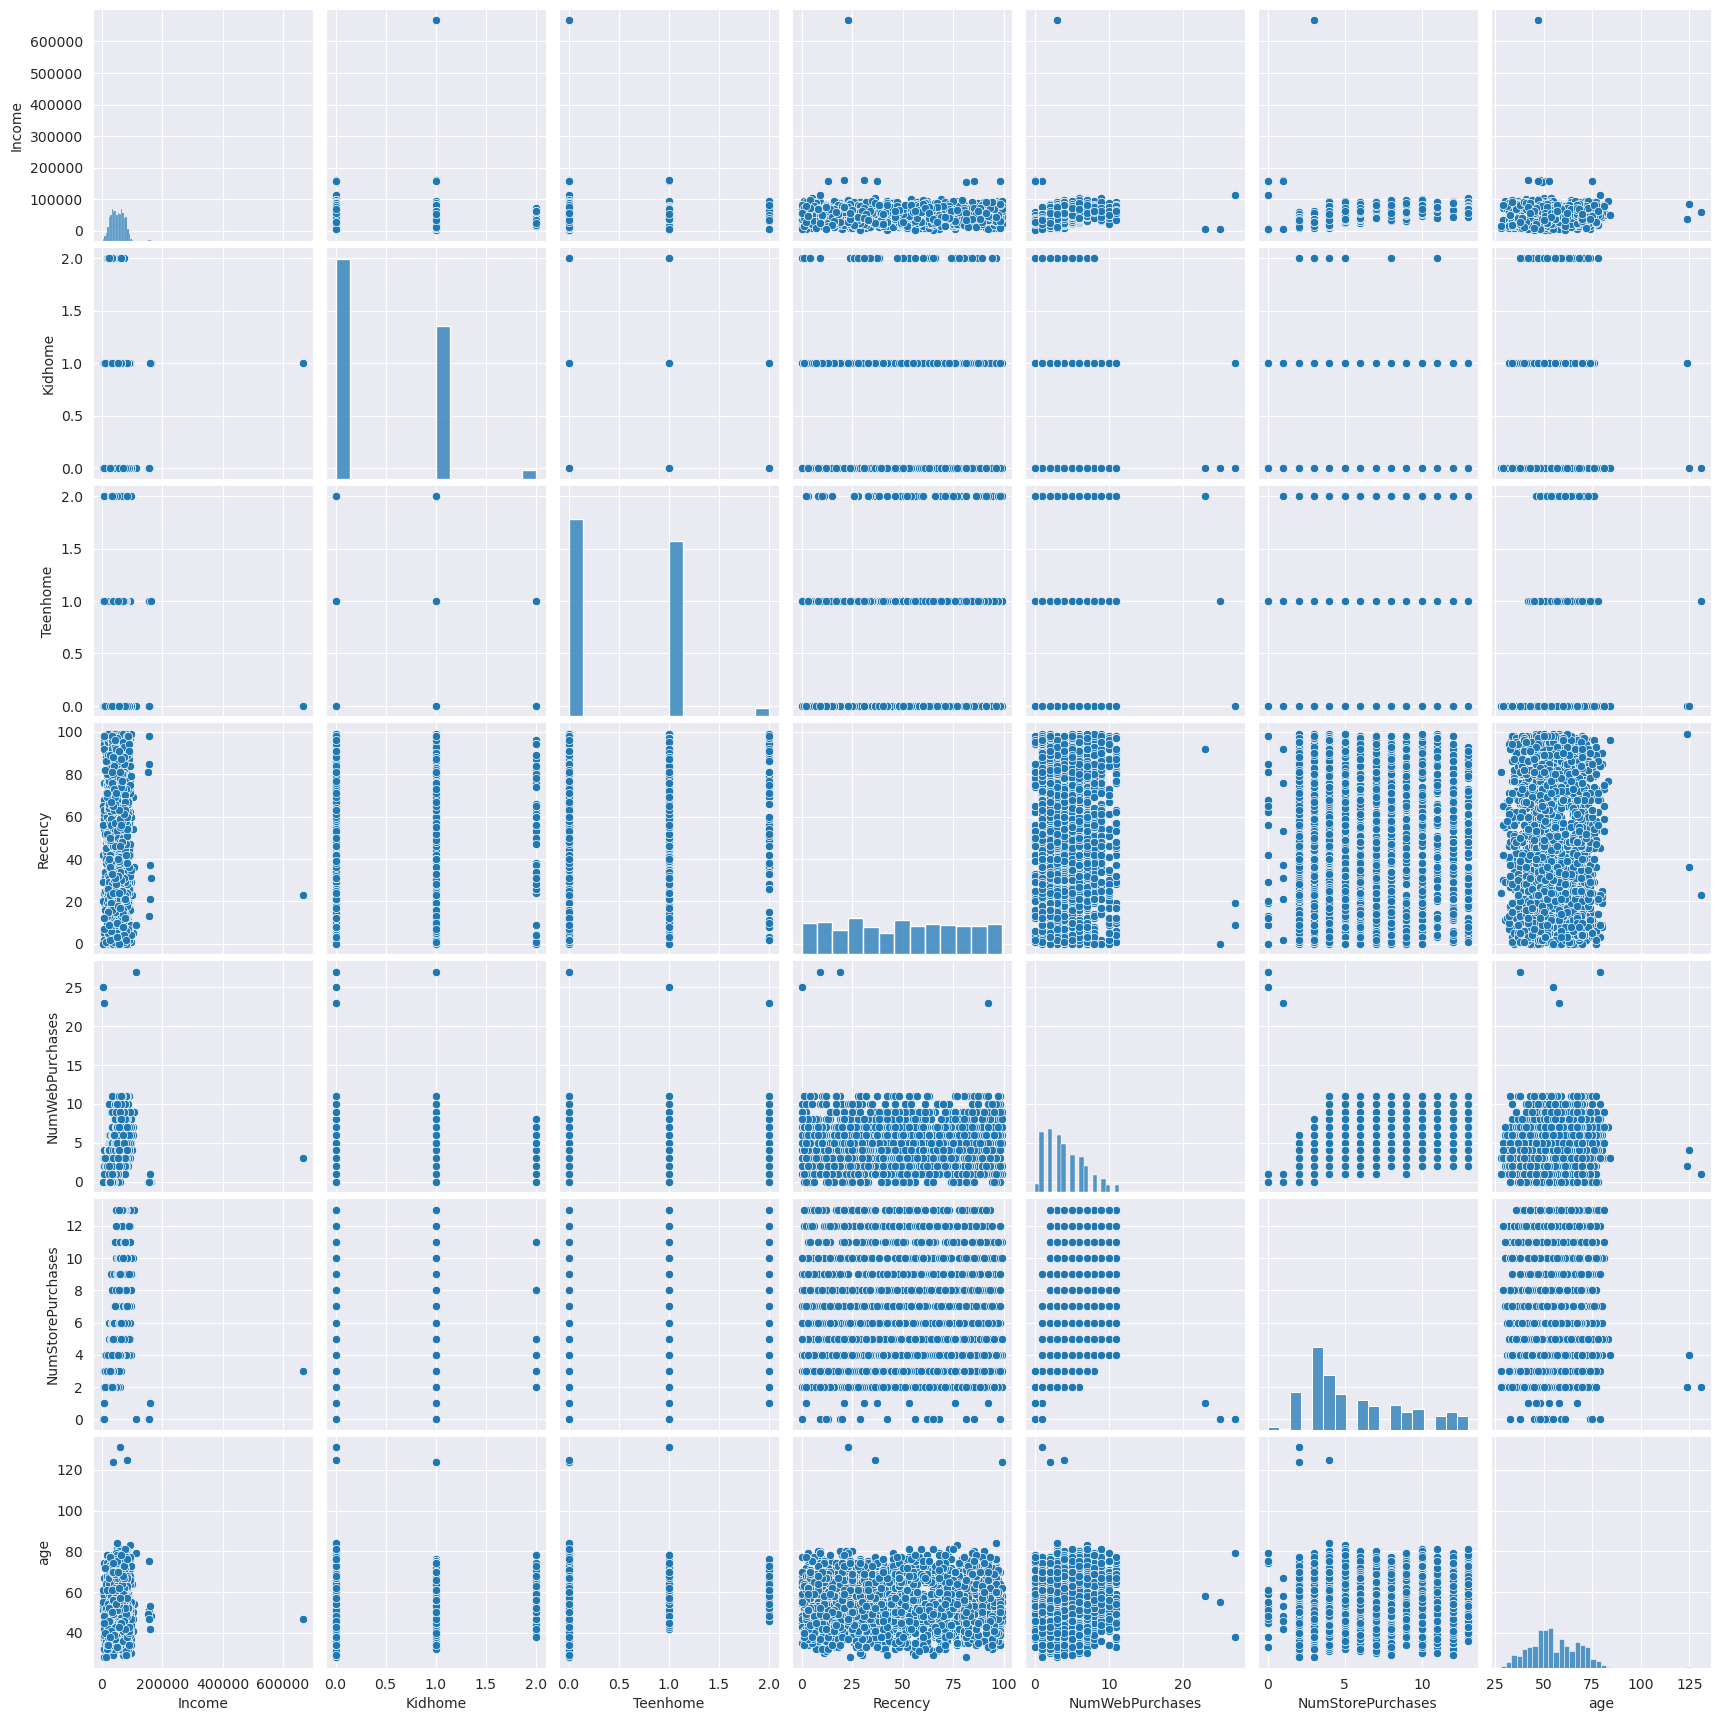

In [54]:
import seaborn as sns

x_df = pd.DataFrame(df[["Education", "Marital_Status", "Income", "Kidhome", "Teenhome", "Recency", "NumWebPurchases", "NumStorePurchases"]])
x_df["age"] = 2024 - df["Year_Birth"]
sns.pairplot(x_df)

Достаточно странно, но чем меньше маленьких детей в семье, тем выше уровень дохода в ней (Kidhome & Income)

Но при этом, если смотреть на количество подростков в семье, то доход начинает распределяться менее выраженно и не зависит от этого параметра (Teenhome & Income)

В основном покупки в интернете делают столько же, сколько и магазинных (NumWAebPurchases & NumStorePurchases)

 

<Axes: xlabel='NumWebPurchases', ylabel='Income'>

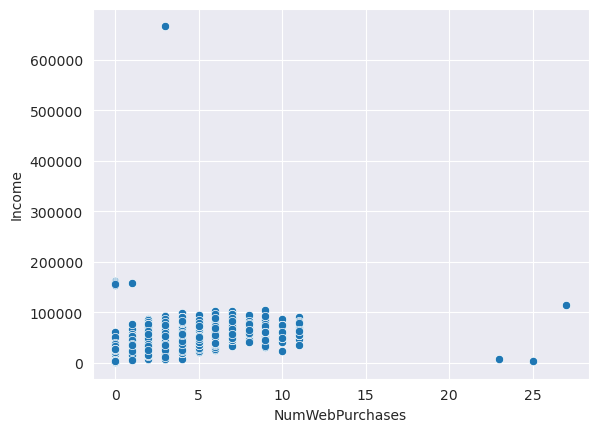

In [55]:
sns.scatterplot(data=x_df, x="NumWebPurchases", y="Income")

Не сильно, но все-таки заметно, что чем выше доход, тем больше становится покупок как и в магазине, так и в интернете

<Axes: xlabel='NumStorePurchases', ylabel='Income'>

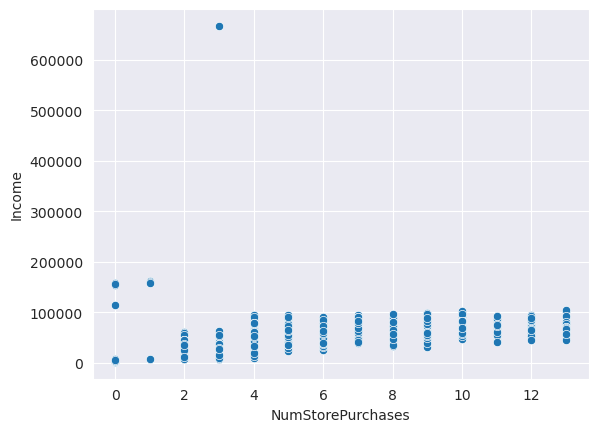

In [56]:
sns.scatterplot(data=x_df, x="NumStorePurchases", y="Income")

Возможно поздно, но заметил, что образование и семейное положение не вошли в попарные графики, поэтому отдельно посмотрим на них:

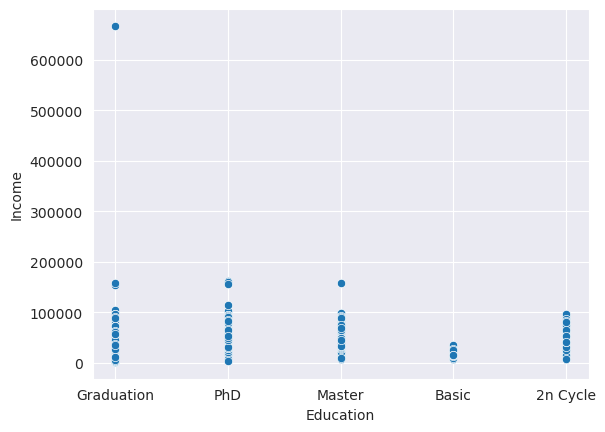

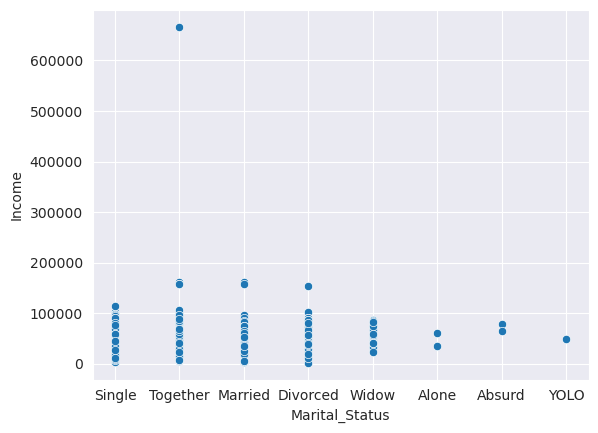

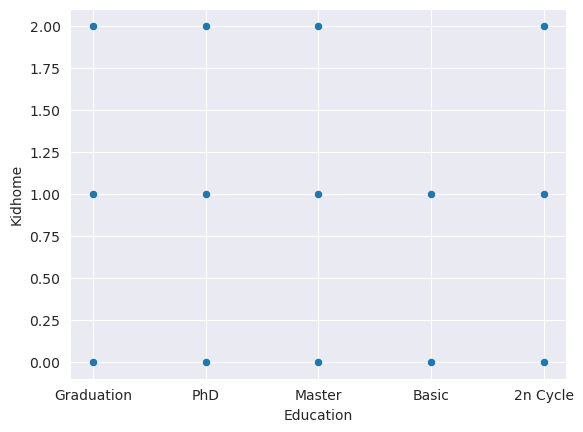

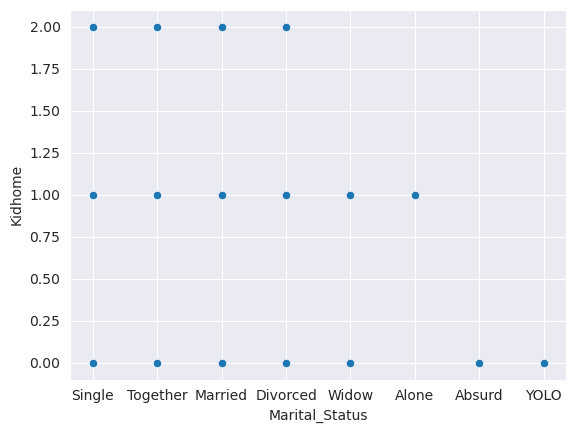

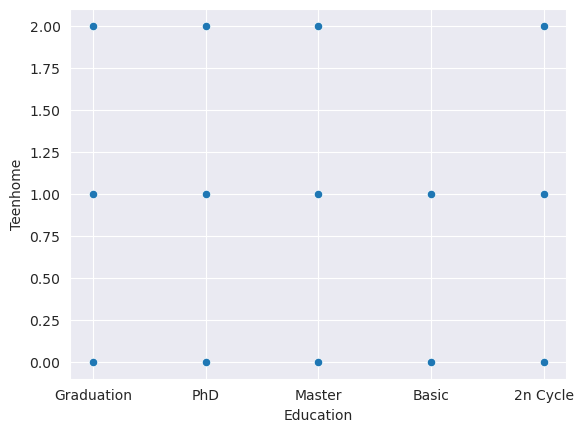

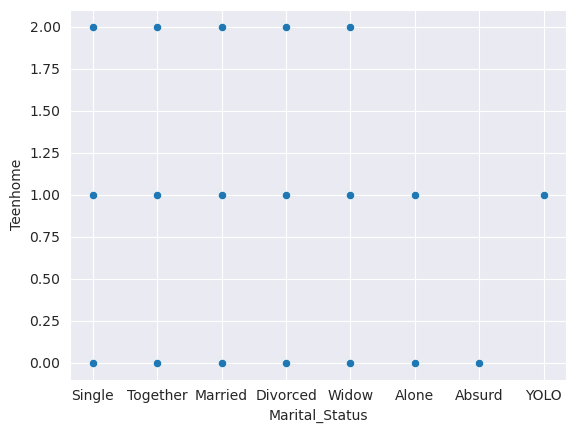

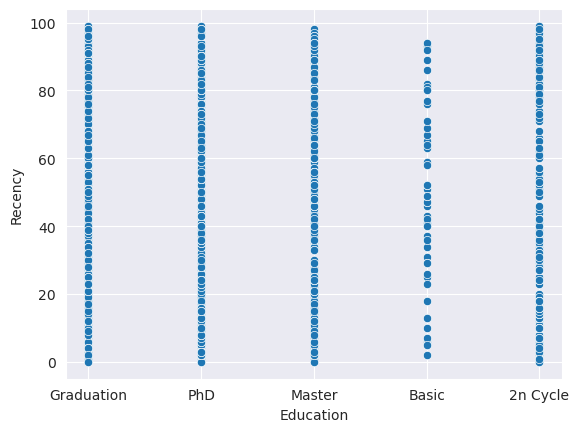

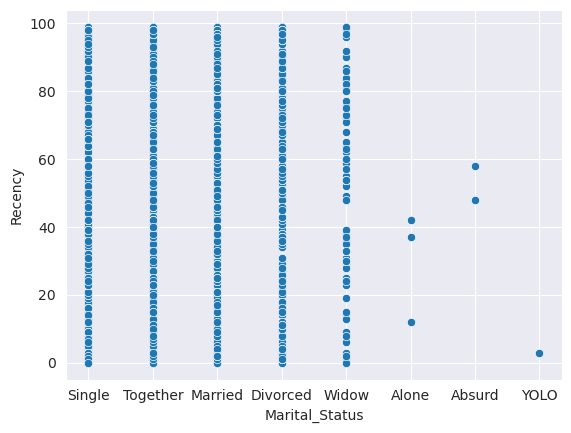

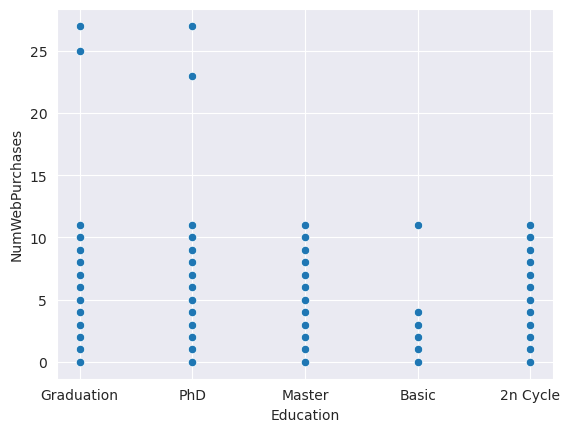

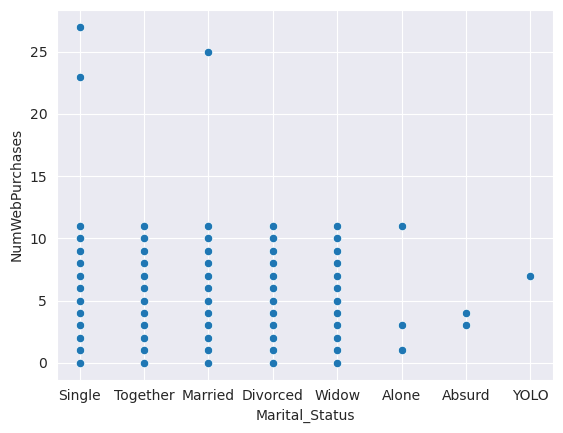

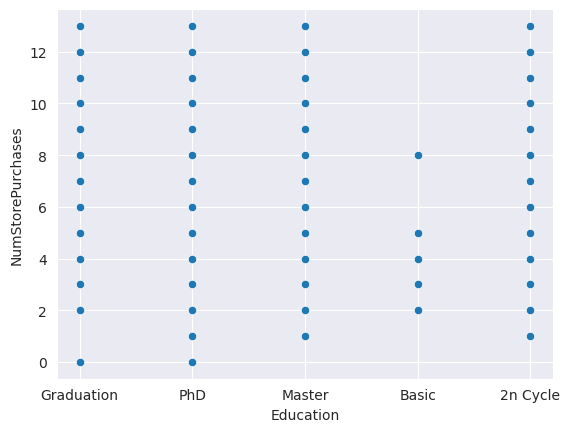

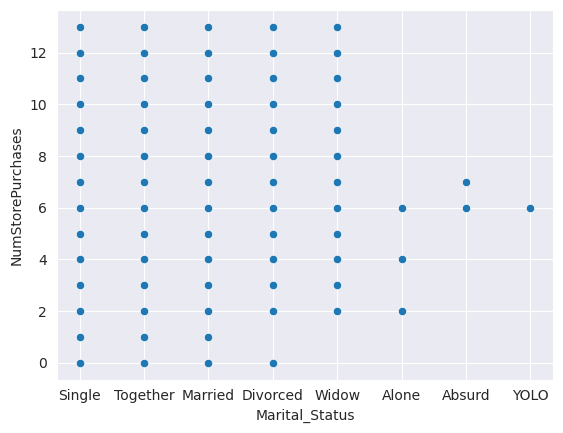

In [57]:
import matplotlib.pyplot as plt

for i in ["Income", "Kidhome", "Teenhome", "Recency", "NumWebPurchases", "NumStorePurchases"]:
    sns.scatterplot(data=x_df, x="Education", y=i)
    plt.show()
    sns.scatterplot(data=x_df, x="Marital_Status", y=i)
    plt.show()

Можно заметить, что чем выше образование, тем больше заработок. Также, хоть мы и видим низкие показатели, при семейном статусе "Alone", "Absurd", "YOLO", мы мало что можем точно про них сказать, так как количество людей с этим статусом мало